In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/interpolate_linear.csv', parse_dates = ['측정일자'])
df.head()

,측정일자,동대문구,종로구,중구,성동구,금천구,송파구,관악구,강동구,서대문구,노원구,마포구,동작구,서초구,구로구,영등포구,강남구,강서구,성북구,중랑구,강북구,양천구,도봉구,은평구,용산구,광진구
0,2010-01-01,35.0,36.0,33.0,31.0,33.0,32.0,36.0,29.0,32.0,30.0,34.0,32.0,32.0,33.0,31.0,36.0,34.0,33.0,33.0,33.0,36.0,31.0,29.0,34.0,32.0
1,2010-01-02,50.0,53.0,48.0,51.0,56.0,46.0,59.0,45.0,53.0,47.0,54.0,57.0,55.0,56.0,53.0,56.0,53.0,42.0,49.0,47.0,62.0,44.0,47.0,51.0,45.0
2,2010-01-03,50.0,44.0,48.0,46.0,45.0,46.0,50.0,42.0,45.0,45.0,51.0,44.0,49.0,48.0,48.0,50.0,49.0,46.0,52.0,44.0,50.0,49.0,47.0,49.0,46.0
3,2010-01-04,38.0,43.0,37.0,38.0,38.0,34.0,39.0,32.0,37.0,37.0,42.0,39.0,37.0,38.0,37.0,38.0,37.0,34.0,40.0,37.0,43.0,33.0,35.0,38.0,34.0
4,2010-01-05,49.0,48.0,49.0,50.0,45.0,47.0,52.0,38.0,56.0,41.0,54.0,48.0,51.0,54.0,52.0,50.0,54.0,44.0,50.0,40.0,53.0,46.0,48.0,51.0,48.0


In [5]:
df.index = df['측정일자']

In [6]:
df

,측정일자,동대문구,종로구,중구,성동구,금천구,송파구,관악구,강동구,서대문구,노원구,마포구,동작구,서초구,구로구,영등포구,강남구,강서구,성북구,중랑구,강북구,양천구,도봉구,은평구,용산구,광진구
측정일자,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010-01-01,35.0,36.0,33.0,31.0,33.0,32.0,36.0,29.0,32.0,30.0,34.0,32.0,32.0,33.0,31.0,36.0,34.0,33.0,33.0,33.0,36.0,31.0,29.0,34.0,32.0
2010-01-02,2010-01-02,50.0,53.0,48.0,51.0,56.0,46.0,59.0,45.0,53.0,47.0,54.0,57.0,55.0,56.0,53.0,56.0,53.0,42.0,49.0,47.0,62.0,44.0,47.0,51.0,45.0
2010-01-03,2010-01-03,50.0,44.0,48.0,46.0,45.0,46.0,50.0,42.0,45.0,45.0,51.0,44.0,49.0,48.0,48.0,50.0,49.0,46.0,52.0,44.0,50.0,49.0,47.0,49.0,46.0
2010-01-04,2010-01-04,38.0,43.0,37.0,38.0,38.0,34.0,39.0,32.0,37.0,37.0,42.0,39.0,37.0,38.0,37.0,38.0,37.0,34.0,40.0,37.0,43.0,33.0,35.0,38.0,34.0
2010-01-05,2010-01-05,49.0,48.0,49.0,50.0,45.0,47.0,52.0,38.0,56.0,41.0,54.0,48.0,51.0,54.0,52.0,50.0,54.0,44.0,50.0,40.0,53.0,46.0,48.0,51.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020-12-27,59.0,70.0,75.0,59.0,63.0,62.0,54.0,73.0,56.0,65.0,55.0,64.0,69.0,65.0,60.0,57.0,64.0,63.0,63.0,72.0,67.0,61.0,62.0,66.0,61.0
2020-12-28,2020-12-28,59.0,66.0,73.0,57.0,59.0,55.0,50.0,73.0,55.0,63.0,47.0,63.0,68.0,61.0,54.0,55.0,63.0,67.0,66.0,63.0,65.0,59.0,57.0,52.0,59.0
2020-12-29,2020-12-29,60.0,69.0,78.0,60.0,70.0,61.0,60.0,68.0,57.0,70.0,61.0,68.0,76.0,73.0,68.0,60.0,80.0,65.0,64.0,68.0,77.0,62.0,65.0,74.0,60.0


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.weightstats import ztest

for i in df.columns[1:]:
  result = seasonal_decompose(df[i], model = 'additive', two_sided = True, extrapolate_trend = 'freq')
  r = result.resid.values
  st, p = ztest(r)

  mu, std = result.resid.mean(), result.resid.std()
  print('평균 :', mu, '표준편차 :', std)

  print(f'이상치 {i} : {len(result.resid[(result.resid>mu+ 2.5*std)|(result.resid<mu- 2.5*std)])}')
  
  outlier = df['측정일자'][result.resid[(result.resid>mu+ 2.5*std)|(result.resid<mu- 2.5*std)].index]

  for j in outlier:
    df.loc[df.index == j,  i] = np.nan

평균 : -0.014577259475214266 표준편차 : 18.65684285002539
이상치 동대문구 : 82
평균 : -0.014790585223634146 표준편차 : 18.404202641931104
이상치 종로구 : 66
평균 : -0.017307321136514415 표준편차 : 18.133571178223505
이상치 중구 : 85
평균 : -0.013612214422849435 표준편차 : 18.37998286422959
이상치 성동구 : 83
평균 : -0.011675775337507981 표준편차 : 16.669627505403543
이상치 금천구 : 83
평균 : -0.015495322071083187 표준편차 : 17.571259761098837
이상치 송파구 : 77
평균 : -0.012802084497309046 표준편차 : 18.627952766405823
이상치 관악구 : 89
평균 : -0.01702669619365703 표준편차 : 18.229934439763646
이상치 강동구 : 87
평균 : -0.012808433477917547 표준편차 : 19.315662776934637
이상치 서대문구 : 82
평균 : -0.018076817586165368 표준편차 : 17.4353485499224
이상치 노원구 : 80
평균 : -0.012032588047659035 표준편차 : 19.28750477633001
이상치 마포구 : 82
평균 : -0.012586219156648986 표준편차 : 17.407206495500517
이상치 동작구 : 88
평균 : -0.01575943966436392 표준편차 : 19.9775611789185
이상치 서초구 : 79
평균 : -0.013614754015090184 표준편차 : 18.95698119867255
이상치 구로구 : 89
평균 : -0.01287065348787186 표준편차 : 19.23664588371112
이상치 영등포구 : 80
평균 : -0.012451620767

In [8]:
for i in df.columns[1:]:
  df[i] = df[i].interpolate()

df = df.reset_index(drop = True)

df.to_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/2.5-sigma ztest.csv', encoding = 'utf-8', index = False)

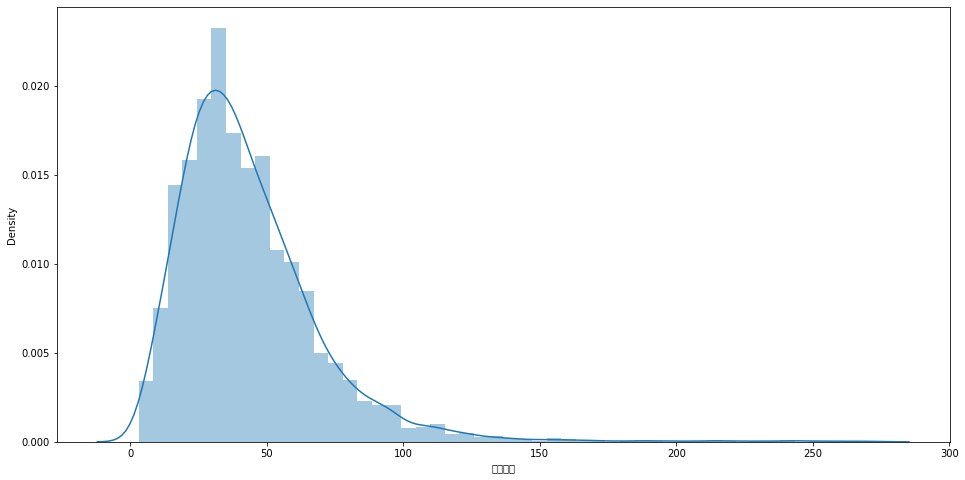

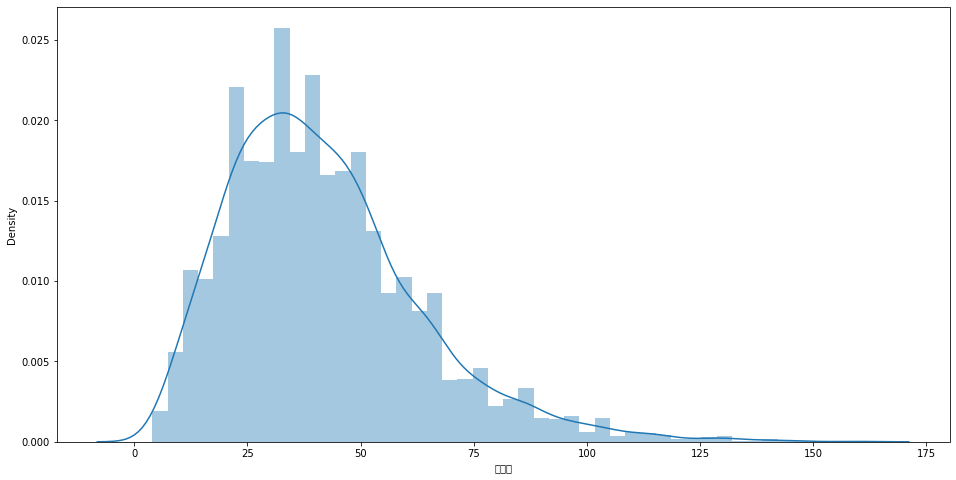

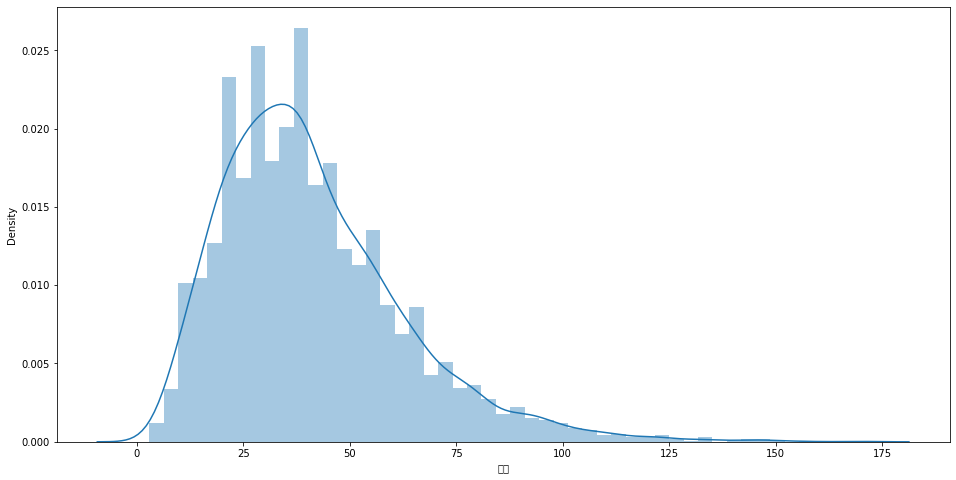

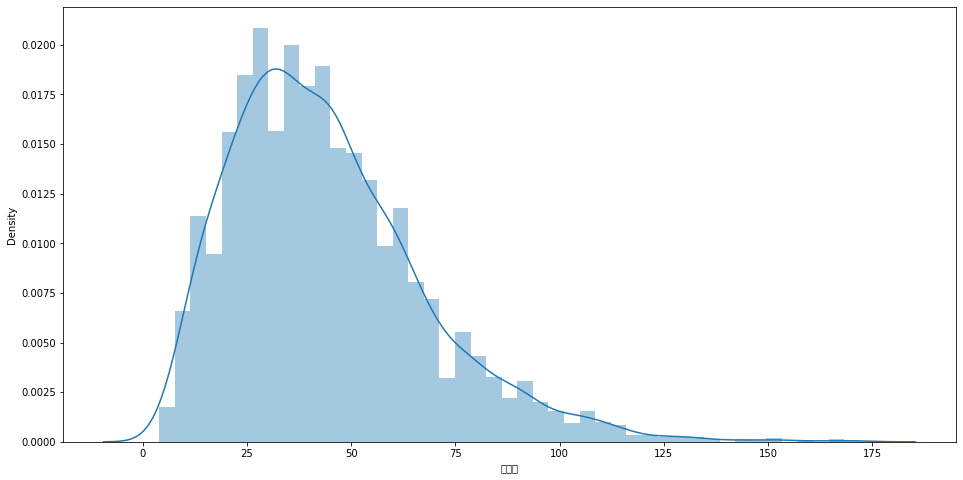

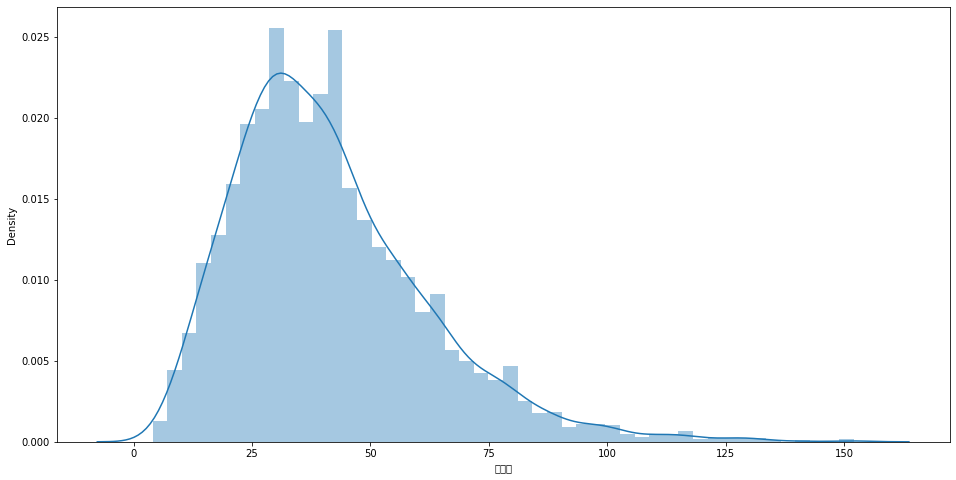

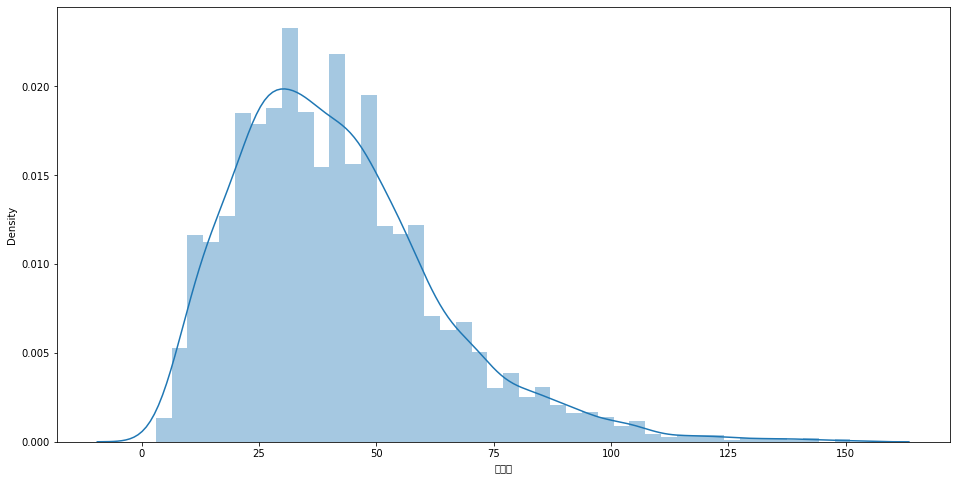

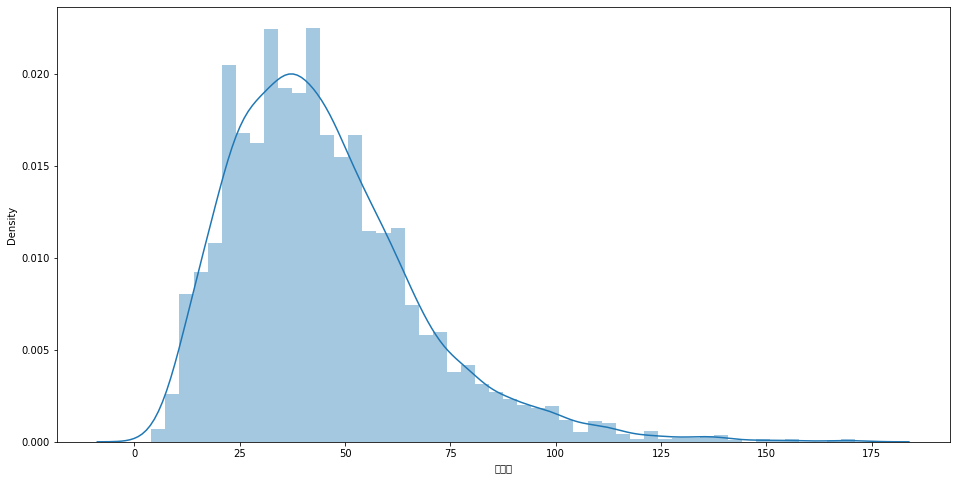

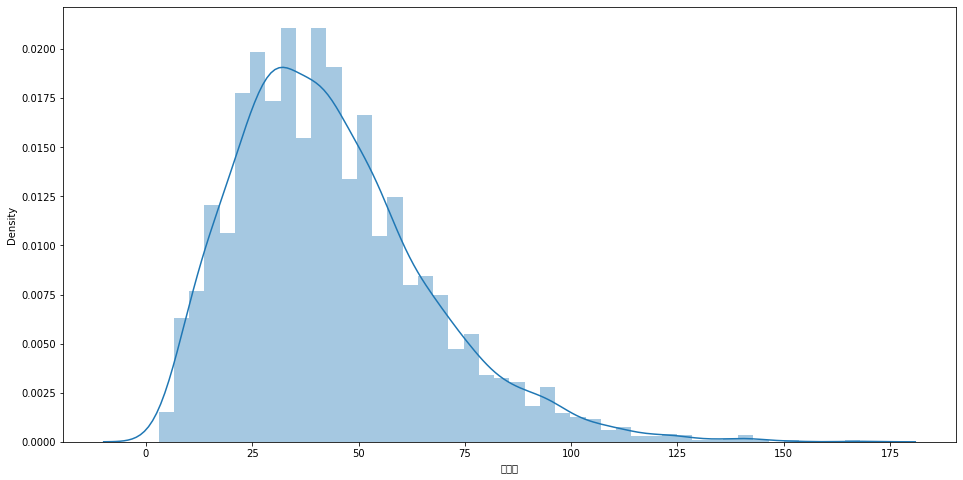

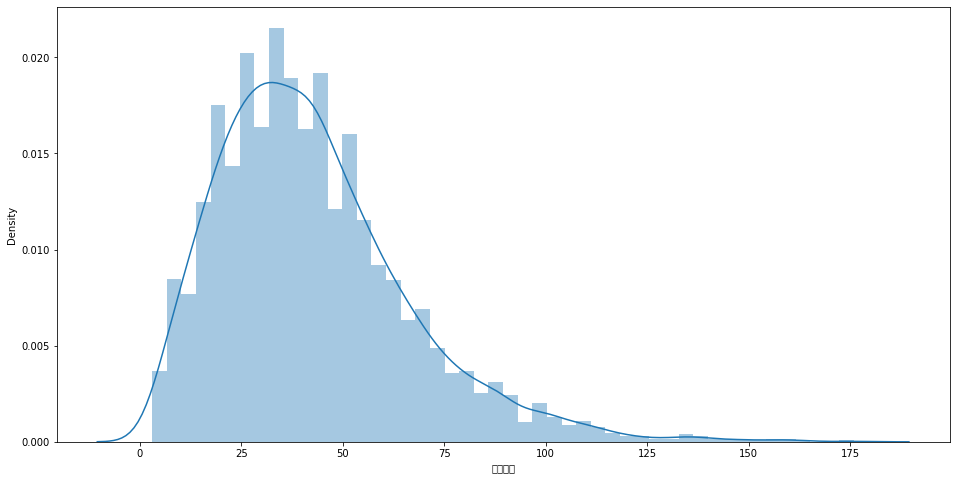

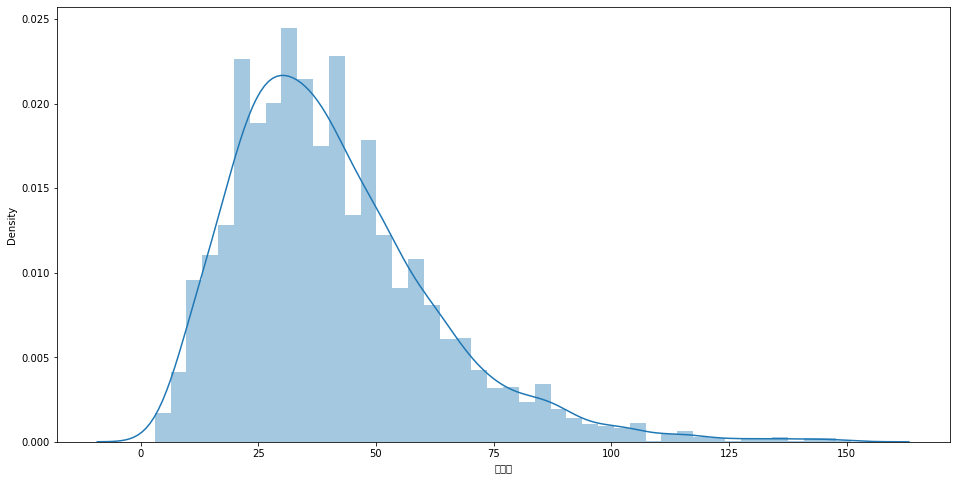

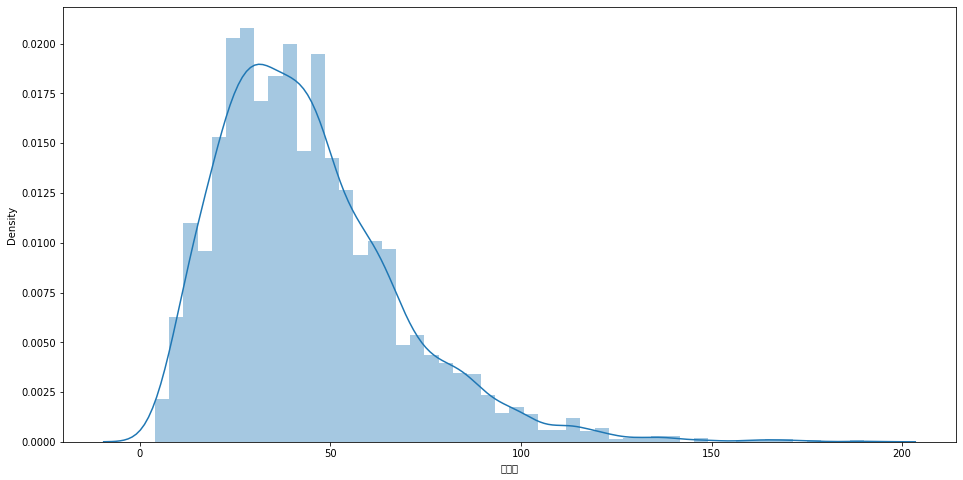

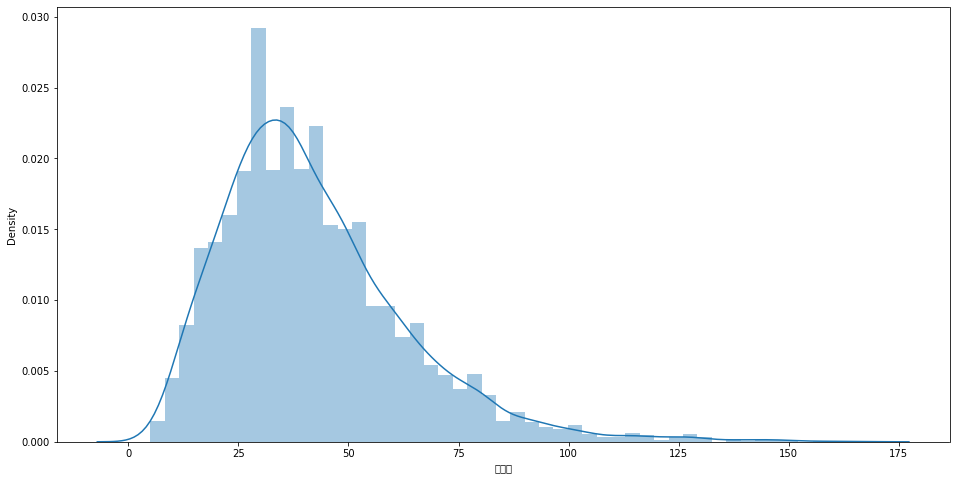

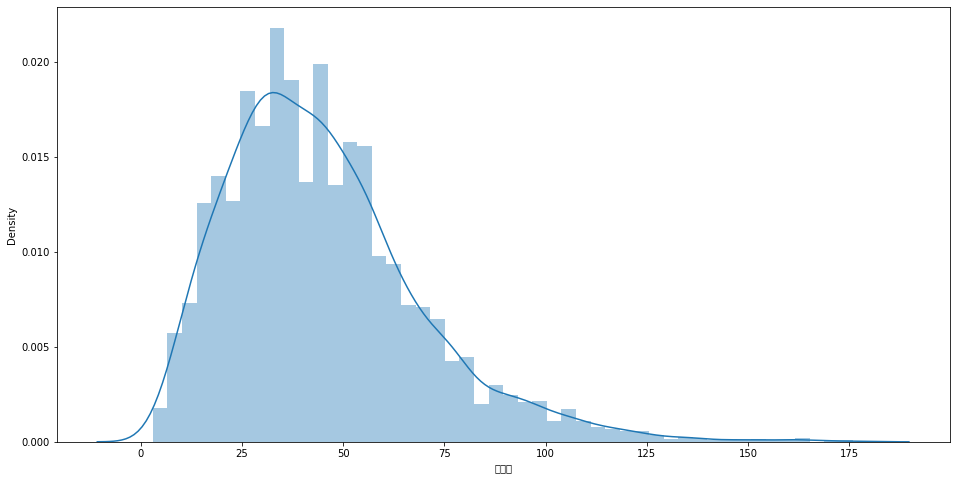

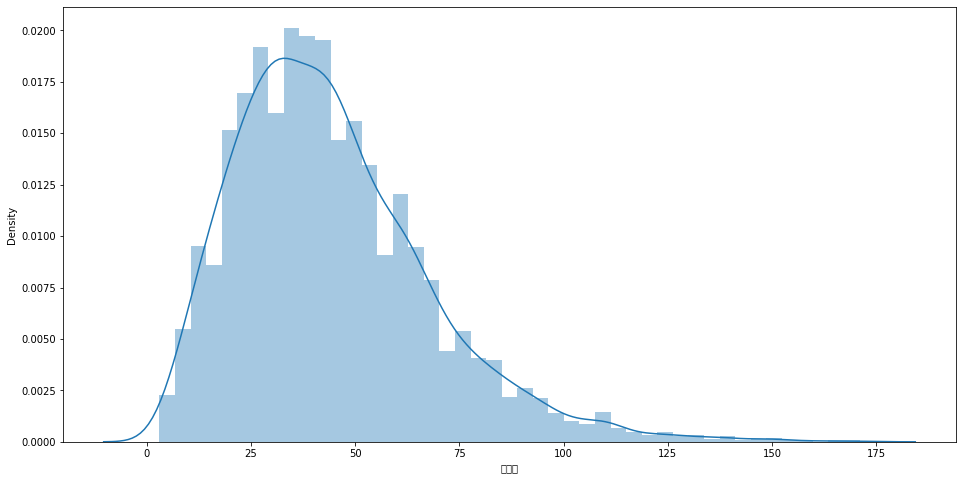

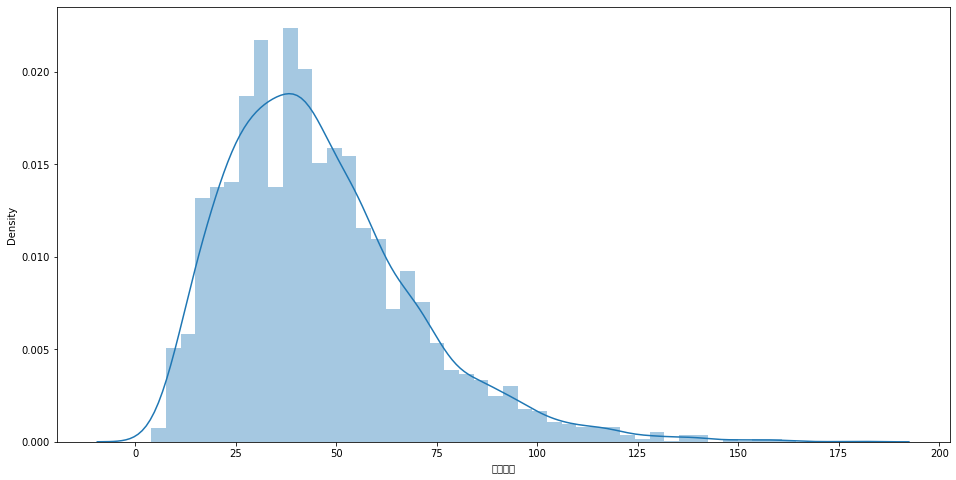

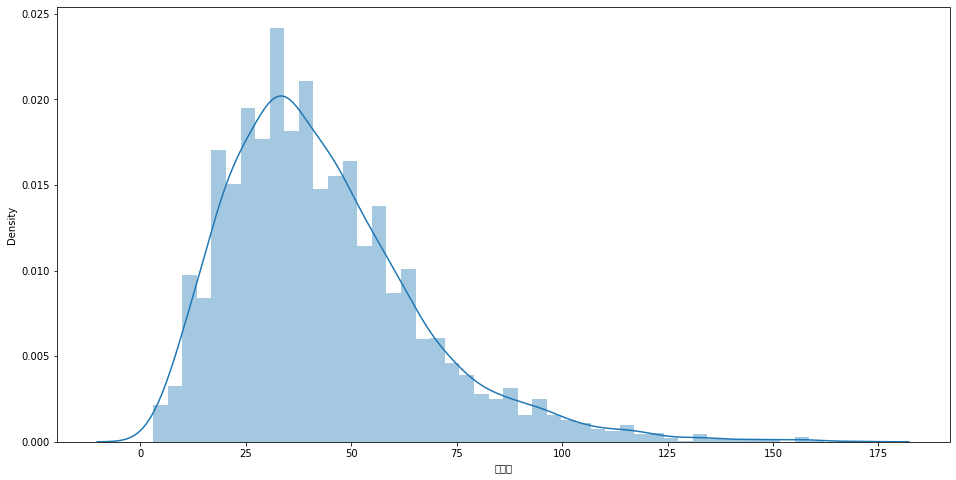

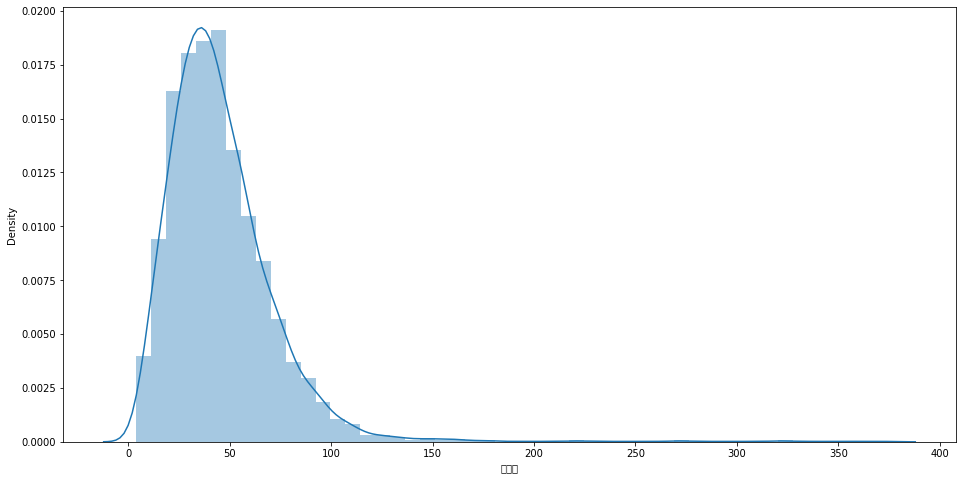

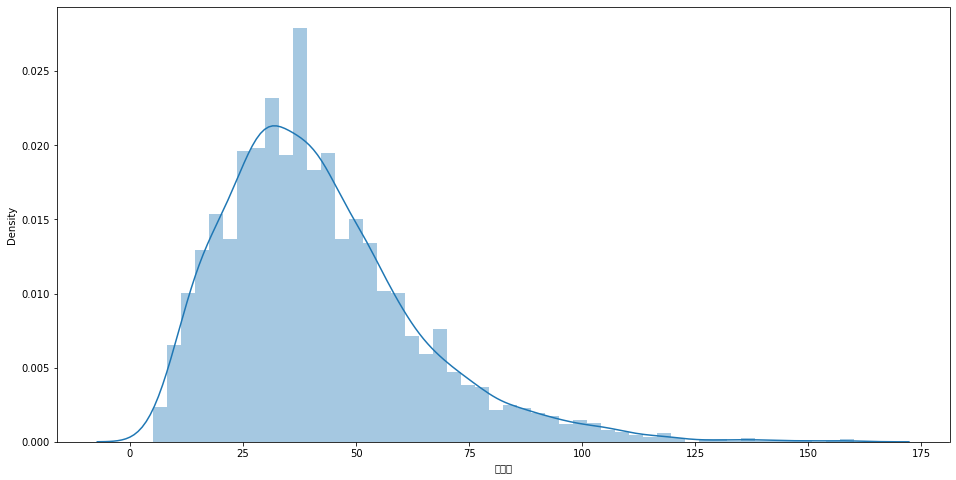

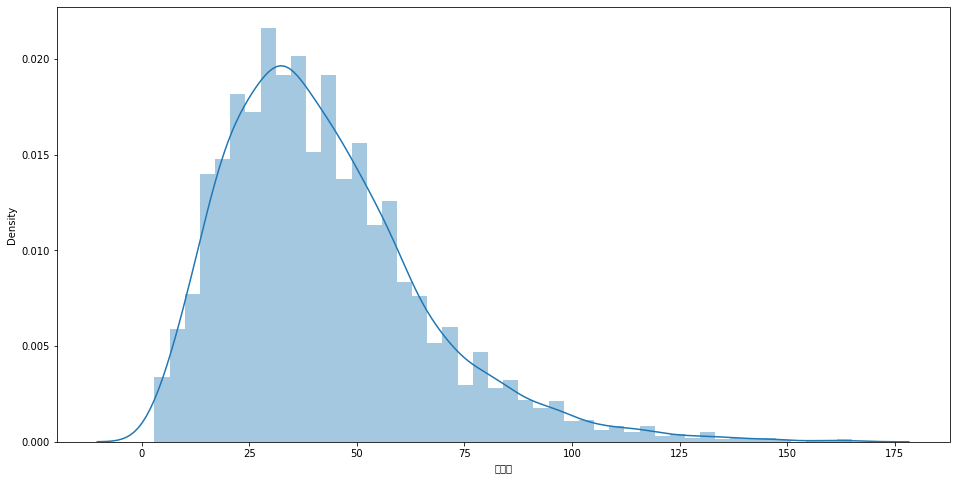

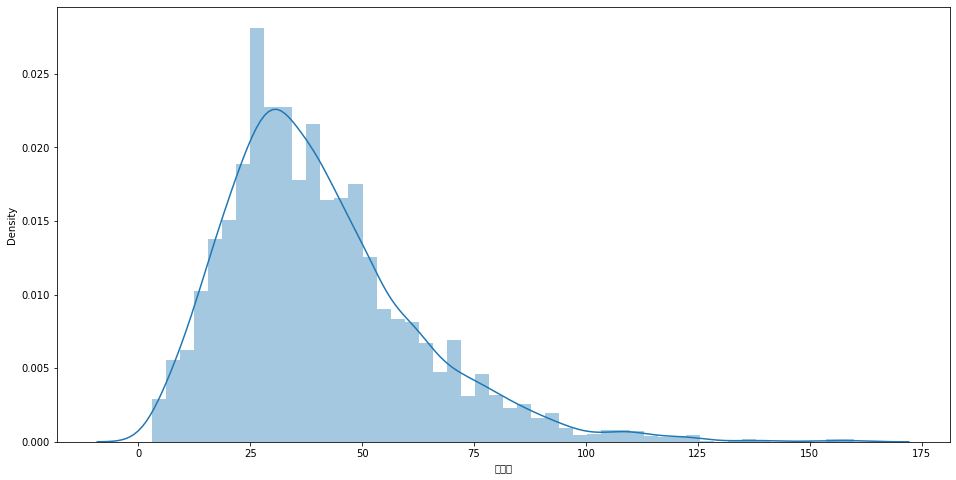

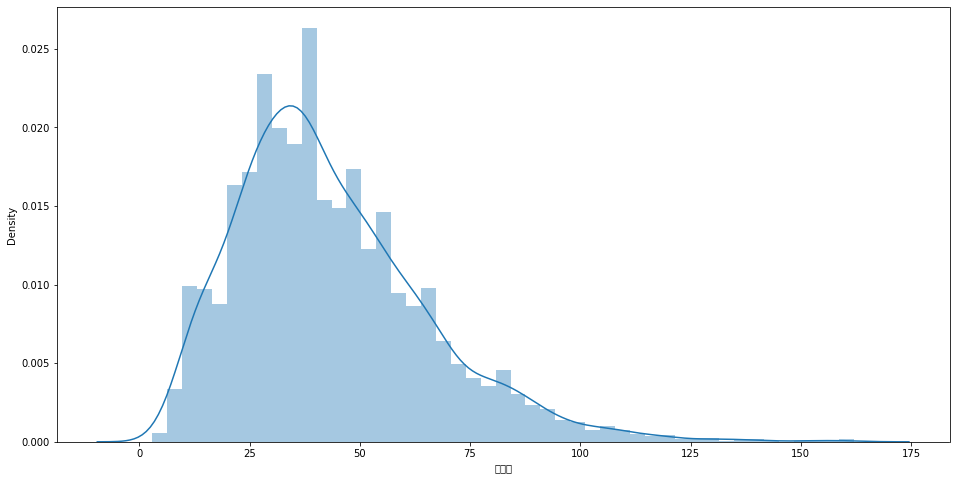

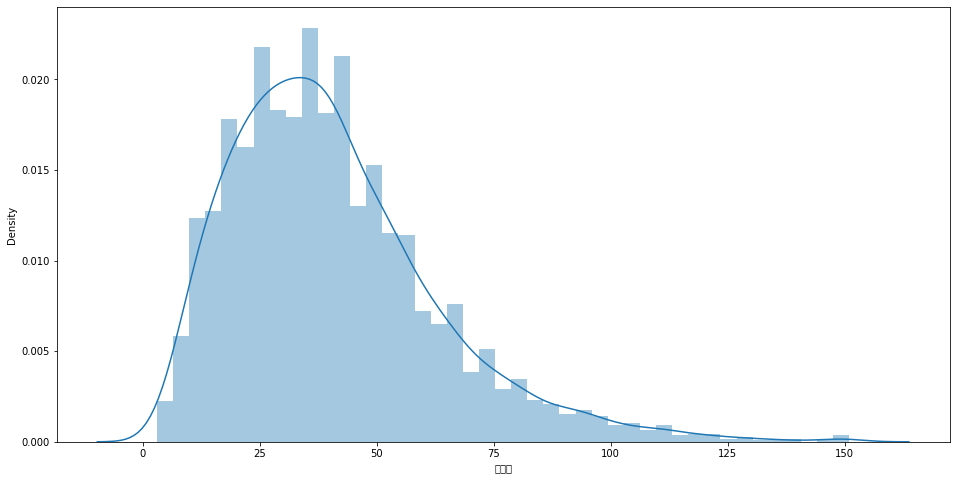

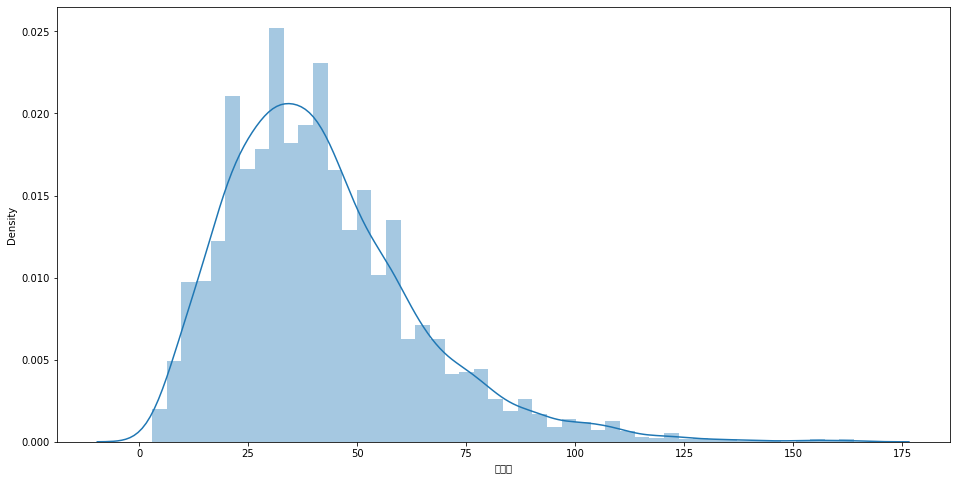

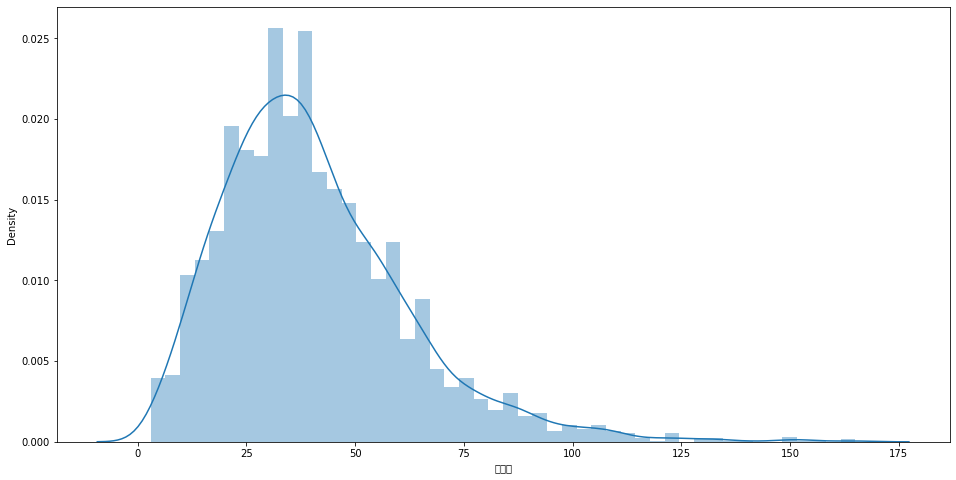

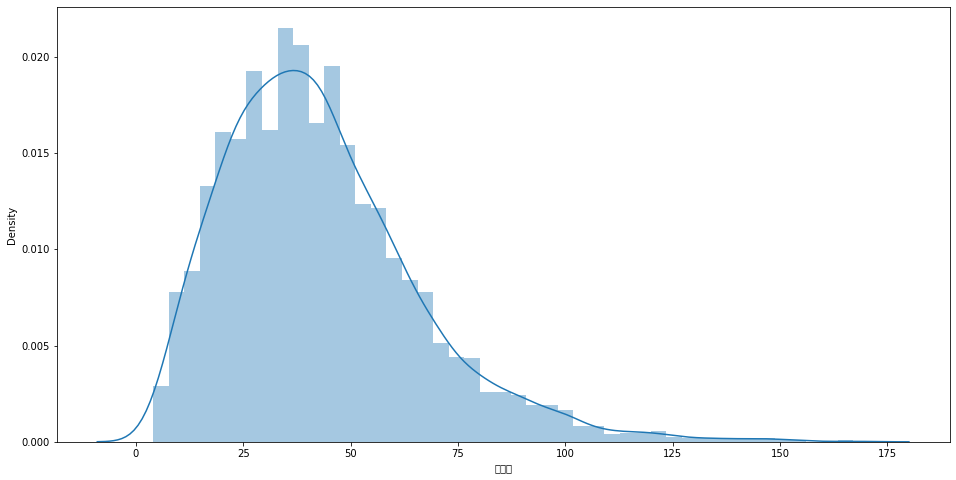

In [9]:
# 이상치를 제거해주고 데이터의 분포를 확인한다.
for i in df.columns[1:]:
  plt.figure(figsize = (16,8))
  sns.distplot(df[i])
  plt.show()